<a href="https://colab.research.google.com/github/eliseleahy/Pytorch-Tutorials/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Pytorch Computer Vision

## 0. Computer vision libaries in PyTorch

* 'torchvision'
* 'torchvision.datasets'
* 'torchvision.models'
* 'torchvision.transform'
* torch.utils.data.Dataset
* torch.utils.data.DataLoader

In [ ]:
#!pip install torch torchvision -U

import torch

print(torch.__version__)

2.1.0+cu121


In [ ]:
#Import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplot lib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Getting a dataset

The dataset we'll be using is fashionMNIST from torch vision.datasets



In [ ]:
# Setup training and test data
train_data = datasets.FashionMNIST(
    root="data", #where to download to
    train =True,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data", #where to download to
    train =False,
    download=True,
    transform = ToTensor(),
    target_transform=None
)



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# Training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
train_data.classes
class_names = train_data.classes

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualising our data

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

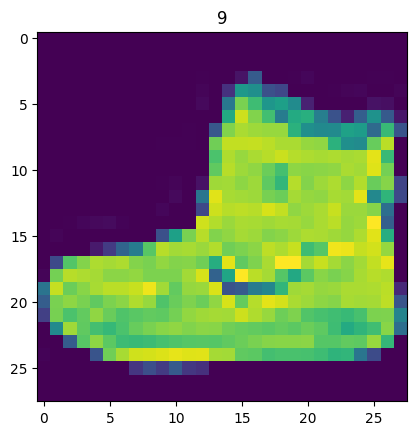

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

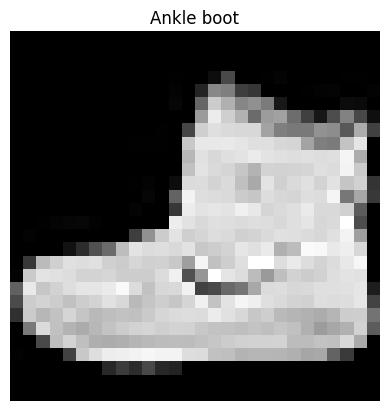

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

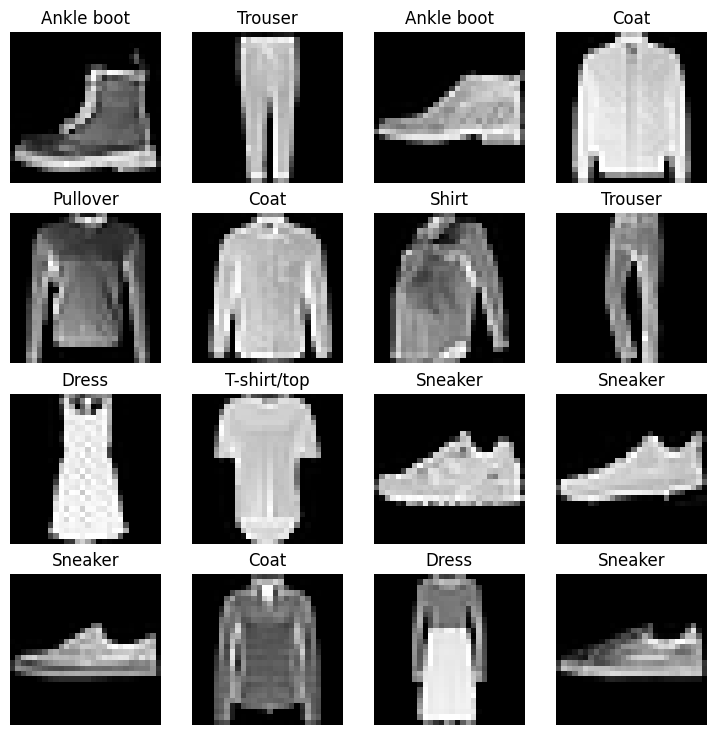

In [ ]:
# plot more images
#torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of cloths could be modled using pure linear lines ro will need some on-linearality?

## 2. Prepare Data Loader

Right now, our data is in pytorch datasets.  Need to conveter from datase to dataloader

Dataloader turns dataset into Python iterable

We want to turn our data into batches, or mini batches

Why do this?

1. it is more computataionall effecicent
2. it gives out NN more chances to update its gradients per epoch - Andrew ng (mini batches gradient descent)


In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE)

# easier to evaluate certain models with test data in the same order.

In [ ]:
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"len dataloader: {len(train_dataloader), len(test_dataloader)}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x799bef74ec80>, <torch.utils.data.dataloader.DataLoader object at 0x799bef8c4970>)
len dataloader: (1875, 313)


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 8


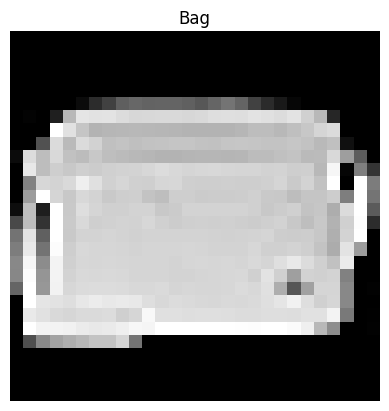

In [ ]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label: {label}")

## 3. Model 0: Build a baseline model

Its best pratice to create a basline model, that can be improved upon, run expirments to improve, e.g. start start simplily  

In [ ]:
## Creat a flatten Layer

flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# flattenr sample
output = flatten_model(x) # one value per pixel (colour, height*width)
output.shape
output.squeeze

<function Tensor.squeeze>

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0=FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict

<bound method Module.state_dict of FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)>

### 3.1 Set up loss function and optimise, and evaluation metrics
* loss function - multiclass data so using nn.CrossEntropyLoss()
* Optimiser - 'torch.optim.SGD()'
* Evaluation metric- working on a classification problem, lets use accuracy as an evaluation method

In [ ]:
import requests
from pathlib import Path

# download helper functions from Leanr pytorch repor

if Path("helper_functions.py").is_file():
  print("Help_fcuntions already downloaded")
else:
  print("downloading helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Help_fcuntions already downloaded


In [ ]:
from helper_functions import accuracy_fn

# Setup loss functions and optimiser

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time experiments

Mahcine learning is very experiemntal.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy ect...)
2. How fast it runs




In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):

  total_time= end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")


In [ ]:
start_time = timer()
# code
end_time = timer()
print_train_time(start_time, end_time)

Train time on None: 0.000 seconds


 ### 3.3 Creating a training loop and training a model on batches of data

1. loop through epoch
2. loop through trainig batches, perform training steps, calculate the train loss *per batch*
3. loop through testing batches, perform testing steps, calculate the tets loss *per batch*
4. print
5. Time it

In [ ]:
#Import tqdm for progress bar

from tqdm.auto import tqdm

# set the seed and start timer
torch.manual_seed(42)

train_time_start_on_cpu = timer()

#keep small for faster training time
epochs = 3

#create traing and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### training
  train_loss = 0
  # add a loop for the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_preds = model_0(X)

    #2. calulcate the loss
    loss = loss_fn(y_preds, y)
    train_loss += loss # accumulate training loss

    #3. optimiser zero grad
    optimizer.zero_grad()

    #4. backwards pass
    loss.backward()

    #5. optmiser step
    optimizer.step()

    #6. print

    if batch % 400 ==0:
      print (f" looked at {batch* len(X)}/{len(train_dataloader.dataset)} samples.")

  # adjust traing loop to get average loss per bacths (in epoch loop)
  # Divide total train loss by length of train dataloader

  train_loss/= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
      for X, y in test_dataloader:
        # 1. Forward pass
        test_pred = model_0(X)

        # 2. Calculate loss (accumatively)
        test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

        # 3. Calculate accuracy (preds need to be same as y_true)
        test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

      # Calculations on test metrics need to happen inside torch.inference_mode()
      # Divide total test loss by length of test dataloader (per batch)
      test_loss /= len(test_dataloader)

      # Divide total accuracy by length of test dataloader (per batch)
      test_acc /= len(test_dataloader)

  ## Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
 looked at 0/60000 samples.
 looked at 12800/60000 samples.
 looked at 25600/60000 samples.
 looked at 38400/60000 samples.
 looked at 51200/60000 samples.

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
 looked at 0/60000 samples.
 looked at 12800/60000 samples.
 looked at 25600/60000 samples.
 looked at 38400/60000 samples.
 looked at 51200/60000 samples.

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
 looked at 0/60000 samples.
 looked at 12800/60000 samples.
 looked at 25600/60000 samples.
 looked at 38400/60000 samples.
 looked at 51200/60000 samples.

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 31.378 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make prediction and get model_0 result - Evaulate model

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """ Returns a doctionary containing the results of model predicting on data_loader."""

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # predictcions
      y_pred = model(X)

      #A ccumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #scale the loss and acc to find avarger loss and acc per batch

    loss /= len(data_loader)

    # Divide total accuracy by length of test dataloader (per batch)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic -code (use GPU if there is one)

